In [159]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [160]:
url = 'https://drive.google.com/uc?export=download&id=1hQ7gq51Ey0zeqWLszaKxuQsOd1ov3k5a'
df = pd.read_csv(url)

# Data Preprocessing

**Basic information: DataFrame contains 395 rows and 33 columns.**

In [161]:
df.shape

(395, 33)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**DataFrame does not contain NULL values.**

Since the table contains three attributes G1, G2, G3, which are related to student grades, it is worth considering the possibility of replacing them with one attribute. One of the reasons is high dimensionality. Therefore, before replacing, we will consider two replacement options:


### 1. G3 (as the final grade) instead of grades G1 and G2.

In [163]:
corr_G1_G3 = df['G1'].corr(df['G3'])
print(f"Correlation between G1 and G3: {corr_G1_G3}")

corr_G2_G3 = df['G2'].corr(df['G3'])
print(f"Correlation between G2 and G3: {corr_G2_G3}")



Correlation between G1 and G3: 0.801467932017414
Correlation between G2 and G3: 0.904867989269301


### 2. **G (как среднее значение G1, G2 и G3).**

In [164]:
df['G'] = df[['G1', 'G2', 'G3']].mean(axis=1)

corr_G1_G = df['G1'].corr(df['G'])
print(f"Correlation between G1 and G: {corr_G1_G}")

corr_G2_G = df['G2'].corr(df['G'])
print(f"Correlation between G2 and G: {corr_G2_G}")

corr_G3_G = df['G3'].corr(df['G'])
print(f"Correlation between G3 and G: {corr_G3_G}")


Correlation between G1 and G: 0.9193861094565472
Correlation between G2 and G: 0.9679987095183208
Correlation between G3 and G: 0.959873154060898


The best correlation results are shown in the second case, which will be more representative, so instead of G1, G2, and G3, there will be a G attribute, the average values:

In [165]:
df['G'] = (df['G1']+df['G2']+df['G3'])/3

df.drop(['G1','G2','G3'], axis=1, inplace=True)

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,8.666667


# Data Analysis

All attributes are divided into three categories: binary, nominal, and numerical. Since each category has its own data type specificity, corresponding types of charts will be applied to analyze and determine the degree of influence of various factors on the final assessment.

### Binary Attributes (1):

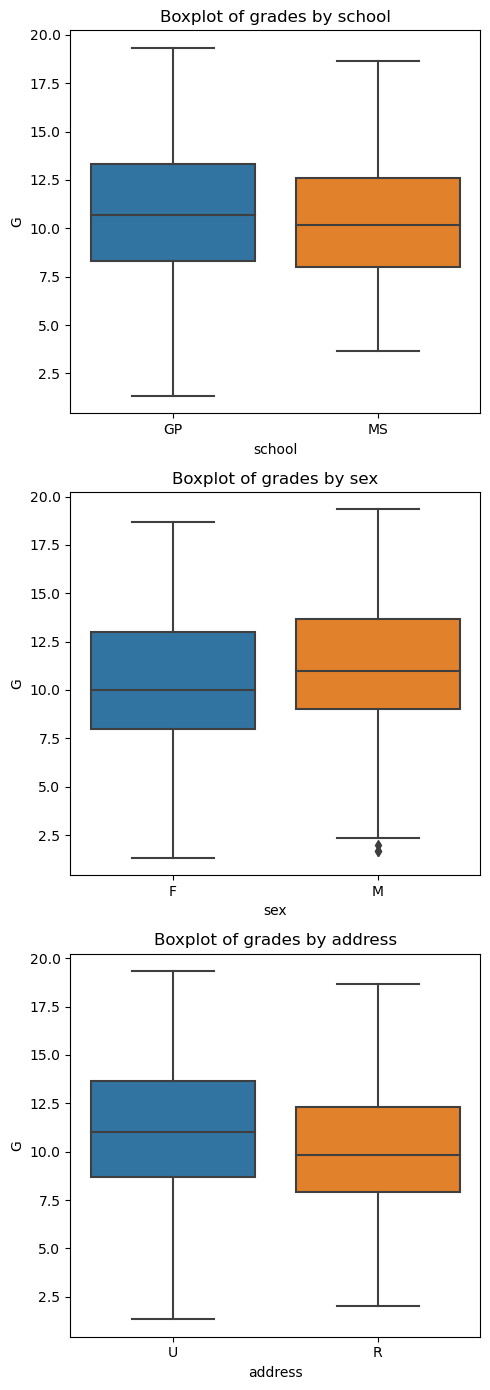

In [166]:
binary_attributes_1 = ['school', 'sex', 'address']
fig, axs = plt.subplots(len(binary_attributes_1), figsize=(5, 14))

for i, attribute in enumerate(binary_attributes_1):
    sns.boxplot(x=attribute, y='G', data=df, ax=axs[i])
    axs[i].set_title(f'Boxplot of grades by {attribute}')

plt.tight_layout()
plt.show()

### ANALYSIS OF GRAPHS WITH BINARY ATTRIBUTES (1):

1. **"Boxplot of grades by school"**

Examining the graph, it can be observed that students from the GP school generally receive slightly higher grades compared to students from the MS school. This is evidenced by the position of the median within the "box." Additionally, the interquartile range (IQR), representing 50% of students' grades, is also slightly larger for the GP school. However, it is worth noting that the range of grades among GP students is greater, as indicated by the "whiskers" of the graph.

*Overall, based on this graph, it can be inferred that the choice of school may have a weak influence on a student's final grade.*

2. **“Boxplot of grades by sex”**

This graph compares the grades of students of different genders: F (female) and M (male). The median grade for male students is around 12.5, slightly higher than that of female students. The interquartile range (IQR), showing the range where 50% of grades lie, is also slightly larger for males, indicating that grades of male students have a slightly larger high central tendency overall. Female students have a median grade below 12.5, and their IQR is slightly smaller than that of males. There is also an outlier indicating students with grades significantly lower than the rest.

*Overall, based on this graph, it can be inferred that a student's gender may also have a weak influence on their final grade.*

3. **“Boxplot of grades by address”**

This graph compares the grades of students living at different addresses: ‘U’ (urban) and ‘R’ (rural). The median grade for students living at urban addresses (‘U’) is higher than for students living at rural addresses (‘R’). The spread of grades (displayed as the "whiskers" of the graph) for both address types is approximately the same, indicating similar variability in grades among these groups.

*Overall, based on this graph, it can be inferred that a student's type of address may influence their final grade.*

### Binary Attributes (2):

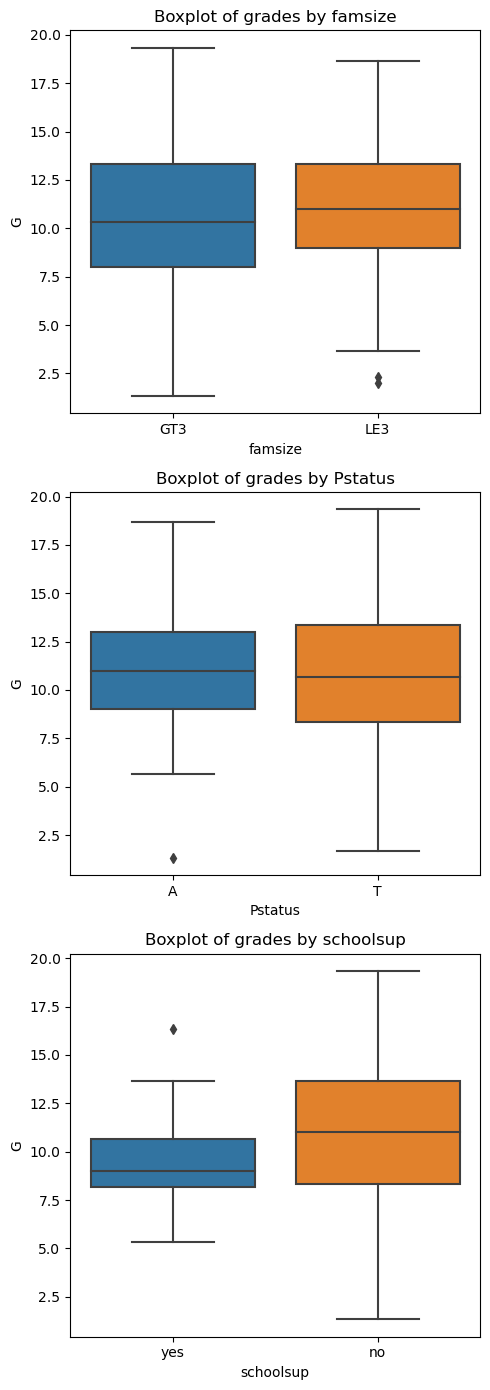

In [167]:
binary_attributes_2 = ['famsize', 'Pstatus', 'schoolsup']

fig, axs = plt.subplots(len(binary_attributes_2), figsize=(5, 14))

for i, attribute in enumerate(binary_attributes_2):
    sns.boxplot(x=attribute, y='G', data=df, ax=axs[i])
    axs[i].set_title(f'Boxplot of grades by {attribute}')

plt.tight_layout()
plt.show()


### ANALYSIS OF GRAPHS WITH BINARY ATTRIBUTES (2):

1. **"Boxplot of grades by FamSize"**

In this graph, we see a comparison of grades among students from families of different sizes: ‘GT3’ (greater than 3) and ‘LE3’ (3 or fewer). Students from larger families (‘GT3’) generally have slightly higher median grades than students from smaller families (‘LE3’). The interquartile range (IQR), representing the range where 50% of grades lie, is approximately from 8 to 13 for students from larger families and from 8.5 to 13 for students from smaller families. However, there is an outlier indicating a student with a significantly lower grade than the rest.

*Based on this data, it can be concluded that family size does not have a significant influence on students' grades, as the median grades and IQR for both groups are similar.*

2. **"Boxplot of grades by Pstatus"**

The graph compares the grades of students whose parents live together (‘T’) or apart (‘A’). Students whose parents live apart have a median grade of around 12.5, slightly higher than students whose parents live together. The interquartile range (IQR), representing the range where 50% of grades lie, is approximately from 9 to 13 for students whose parents live apart and from 8 to 13 for students whose parents live together.

*Based on this data, it can be concluded that the cohabitation status of parents does not have a significant influence on students' grades.*

3. **"Boxplot of grades by SchoolSup"**

The graph illustrates a comparison of grades between students receiving additional educational support at school (schoolsup) and those who do not. Students not receiving additional educational support at school (‘no’) have a higher median grade than students receiving such support (‘yes’). This is evident from the line inside the "box," representing the median. Also, it is noticeable from the IQR that for 50% of students with schoolsup, the range is wider and slightly higher.

*Based on this data, it can be concluded that additional support from the school has a noticeable impact on students' grades.*

### Binary Attributes (3):

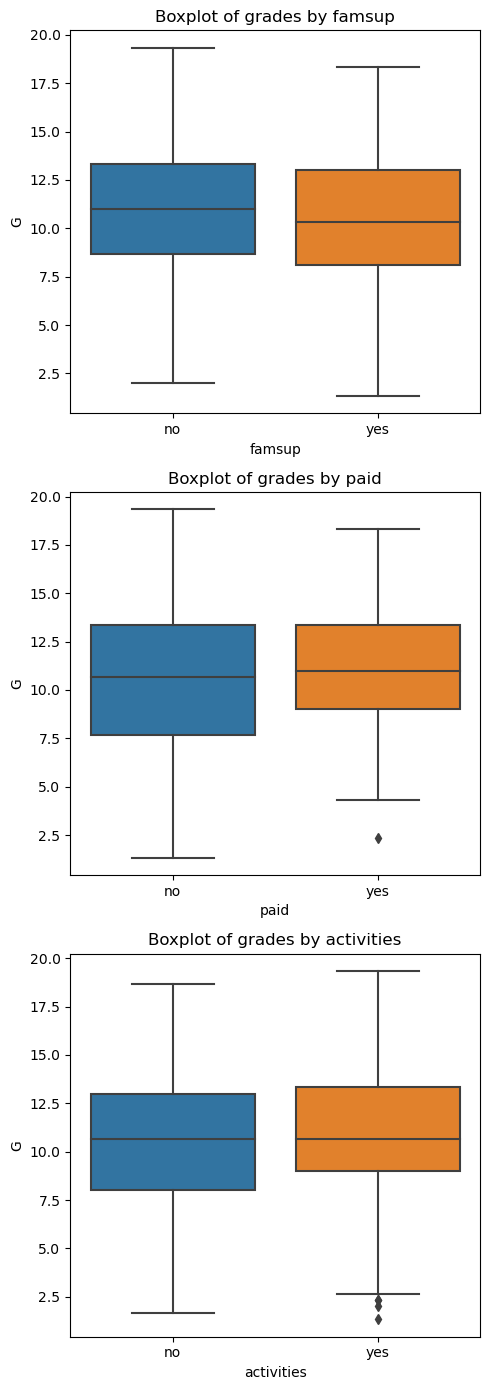

In [168]:
binary_attributes_3 = ['famsup', 'paid', 'activities']

fig, axs = plt.subplots(len(binary_attributes_3), figsize=(5, 14))

for i, attribute in enumerate(binary_attributes_3):
    sns.boxplot(x=attribute, y='G', data=df, ax=axs[i])
    axs[i].set_title(f'Boxplot of grades by {attribute}')

plt.tight_layout()
plt.show()

### ANALYSIS OF GRAPHS WITH BINARY ATTRIBUTES (3):

1. **"Boxplot of grades by FamSup"**

In this graph, we see a comparison of grades between students receiving family educational support (famsup) and those who do not. Students receiving family educational support (‘yes’) have a median grade slightly higher than students not receiving such support (‘no’). This is evident from the line inside the "box," representing the median. The spread of grades (displayed as the "whiskers" of the graph) for both groups is approximately the same, indicating similar variability in grades among these groups.

*Thus, it can be concluded that this factor has a weak influence on the final grade.*

2. **"Boxplot of grades by Paid"**

The graph compares the grades of students who pay for additional classes (paid) and those who do not. Students who do not pay for additional classes (‘no’) have a median grade slightly higher than students who pay for such classes (‘yes’). This is evident from the line inside the "box," representing the median. The IQR for the "no" group has a higher range with a downward trend and a wider spread of grades compared to the "yes" group.

*Thus, it can be concluded that this factor does not have a significant influence on the final grade.*

3. **"Boxplot of grades by Activities"**

In this graph, we see a comparison of grades between students participating in extracurricular activities (activities) and those who do not. The median grade for students participating in extracurricular activities (‘yes’) is almost identical to the median grade for students not participating in such activities (‘no’). This is evident from the line inside the "box," representing the median. However, the spread of grades for both groups is approximately the same, indicating similar variability in grades among these groups.

*Therefore, it can be concluded that this factor does not have a significant influence on students' final grades.*

### Binary Attributes (4):

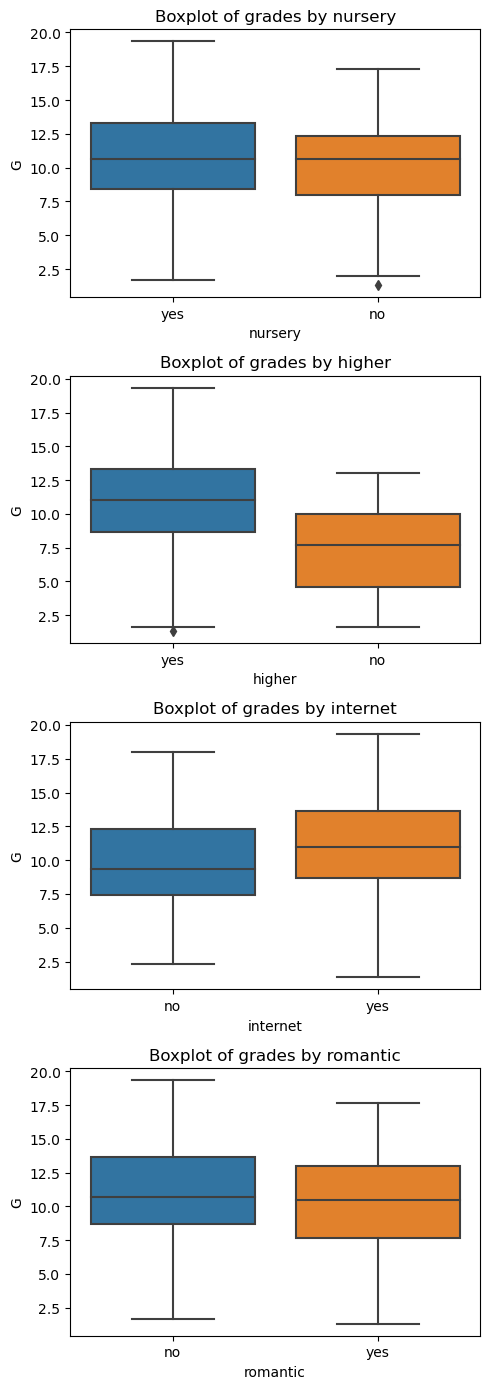

In [169]:
binary_attributes_4 = ['nursery', 'higher', 'internet', 'romantic']

fig, axs = plt.subplots(len(binary_attributes_4), figsize=(5, 14))

for i, attribute in enumerate(binary_attributes_4):
    sns.boxplot(x=attribute, y='G', data=df, ax=axs[i])
    axs[i].set_title(f'Boxplot of grades by {attribute}')

plt.tight_layout()
plt.show()

### ANALYSIS OF GRAPHS WITH BINARY ATTRIBUTES (4):

1. **"Boxplot of grades by Nursery"**

In this graph, the distribution of grades is presented depending on whether students attended nursery. Students who attended nursery have a median grade slightly above 10. The interquartile range (IQR), which represents the range where 50% of grades lie, is also slightly larger than those who did not attend nursery. Students who did not attend nursery have a median grade slightly lower than those who did. Their IQR is also slightly smaller. Additionally, there is an outlier with a grade below 5.

*Based on this graph, it can be concluded that attending nursery may have a weak influence on a student's final grade.*

2. **"Boxplot of grades by Higher"**

Students aspiring for higher education have a median grade of approximately 11. The interquartile range (IQR), representing the range where 50% of grades lie, is approximately from 9 to 13. This indicates that most of these students receive grades within this range. Students not aspiring for higher education have a median grade around 7.5. Their IQR is approximately from 5 to 10, which is lower than that of students aspiring for higher education.

*Based on this data, it can be concluded that aspiring for higher education may positively influence students' grades, as the median grades and IQR for students aspiring for higher education are higher.*

3. **"Boxplot of grades by Internet"**

Students without internet access have a median grade slightly above 10. The interquartile range (IQR), representing the range where 50% of grades lie, is approximately from 7.5 to 12.5. Students with internet access have a median grade slightly below 10.

*Therefore, it can be assumed that having internet access may positively impact final grades.*

4. **"Boxplot of grades by Romantic"**

Students not in romantic relationships have a median grade around 11. The interquartile range (IQR), representing the range where 50% of grades lie, is approximately from 9 to 14. Students in romantic relationships have a median grade approximately equal to 11. Their IQR is approximately from 8 to 13, slightly lower than the IQR of students not in romantic relationships.

*Based on this data, it can be assumed that being in romantic relationships may not significantly influence students' grades, as the median grades and IQR for both groups are similar.*

### Nominal Attributes (1):

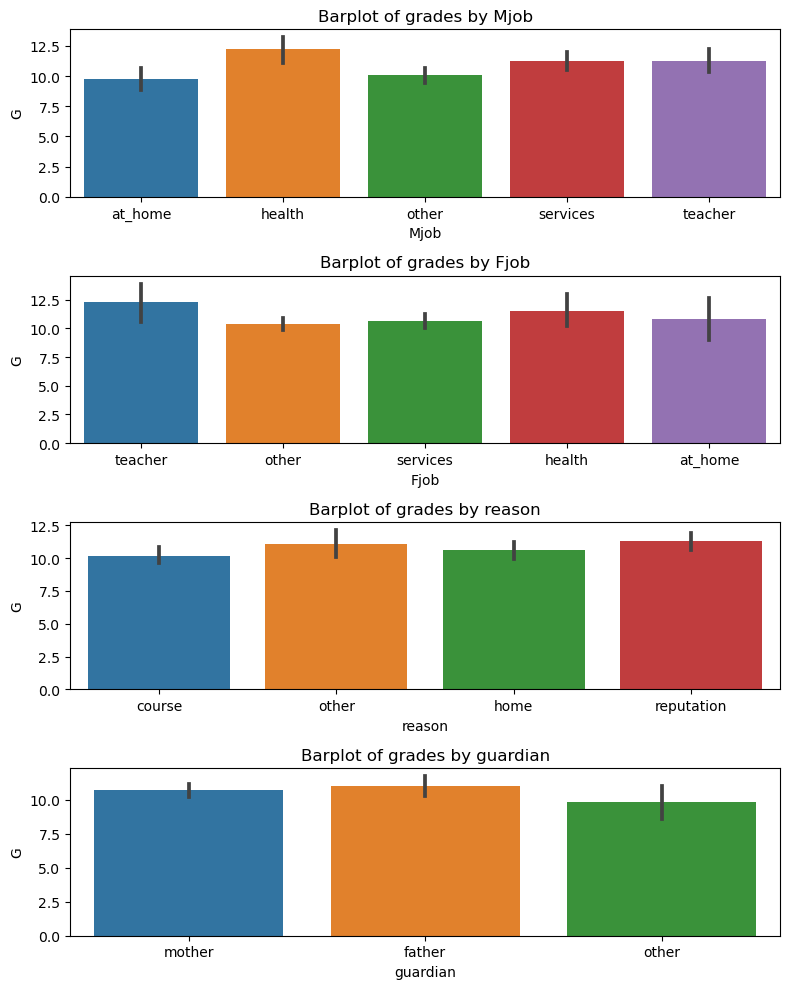

In [170]:
nominal_attributes_1 = ['Mjob', 'Fjob', 'reason', 'guardian']

fig, axs = plt.subplots(len(nominal_attributes_1), figsize=(8, 10))

for i, attribute in enumerate(nominal_attributes_1):
    sns.barplot(x=attribute, y='G', data=df, ax=axs[i])
    axs[i].set_title(f'Barplot of grades by {attribute}')

plt.tight_layout()
plt.show()

### ANALYSIS OF GRAPHS WITH NOMINAL ATTRIBUTES (1):

1. **Barplot of grades by Mjob.**

From the graph, it can be observed that students whose mothers work in the healthcare sector (health) generally achieve higher grades compared to other groups. Students whose mothers work at home (at_home) tend to achieve lower grades on average.

2. **Barplot of grades by Fjob.**

Among students whose fathers work as teachers (teacher), there is a higher average grade compared to other groups. Students whose fathers work at home (at_home) tend to have lower grades on average.

**Conclusion for 1, 2:** *Based on this data, it can be hypothesized that the profession of parents may influence students' grades.*

3. **Barplot of grades by reason**

Students who chose the school based on its reputation and other reasons generally achieve higher grades compared to other groups. Students who chose the school based on the course tend to achieve lower grades on average.

*Therefore, based on this data, it can be concluded that the reason for choosing the school has a weak influence on grades, as the difference between the indicators is insignificant.*

4. **Barplot of grades by Guardian**

Students whose guardians are either mothers or fathers tend to achieve higher grades on average compared to students whose guardians are not parents.

*Thus, we can see that the choice of guardian influences students' final grades.*

### Numerical Attributes (1):

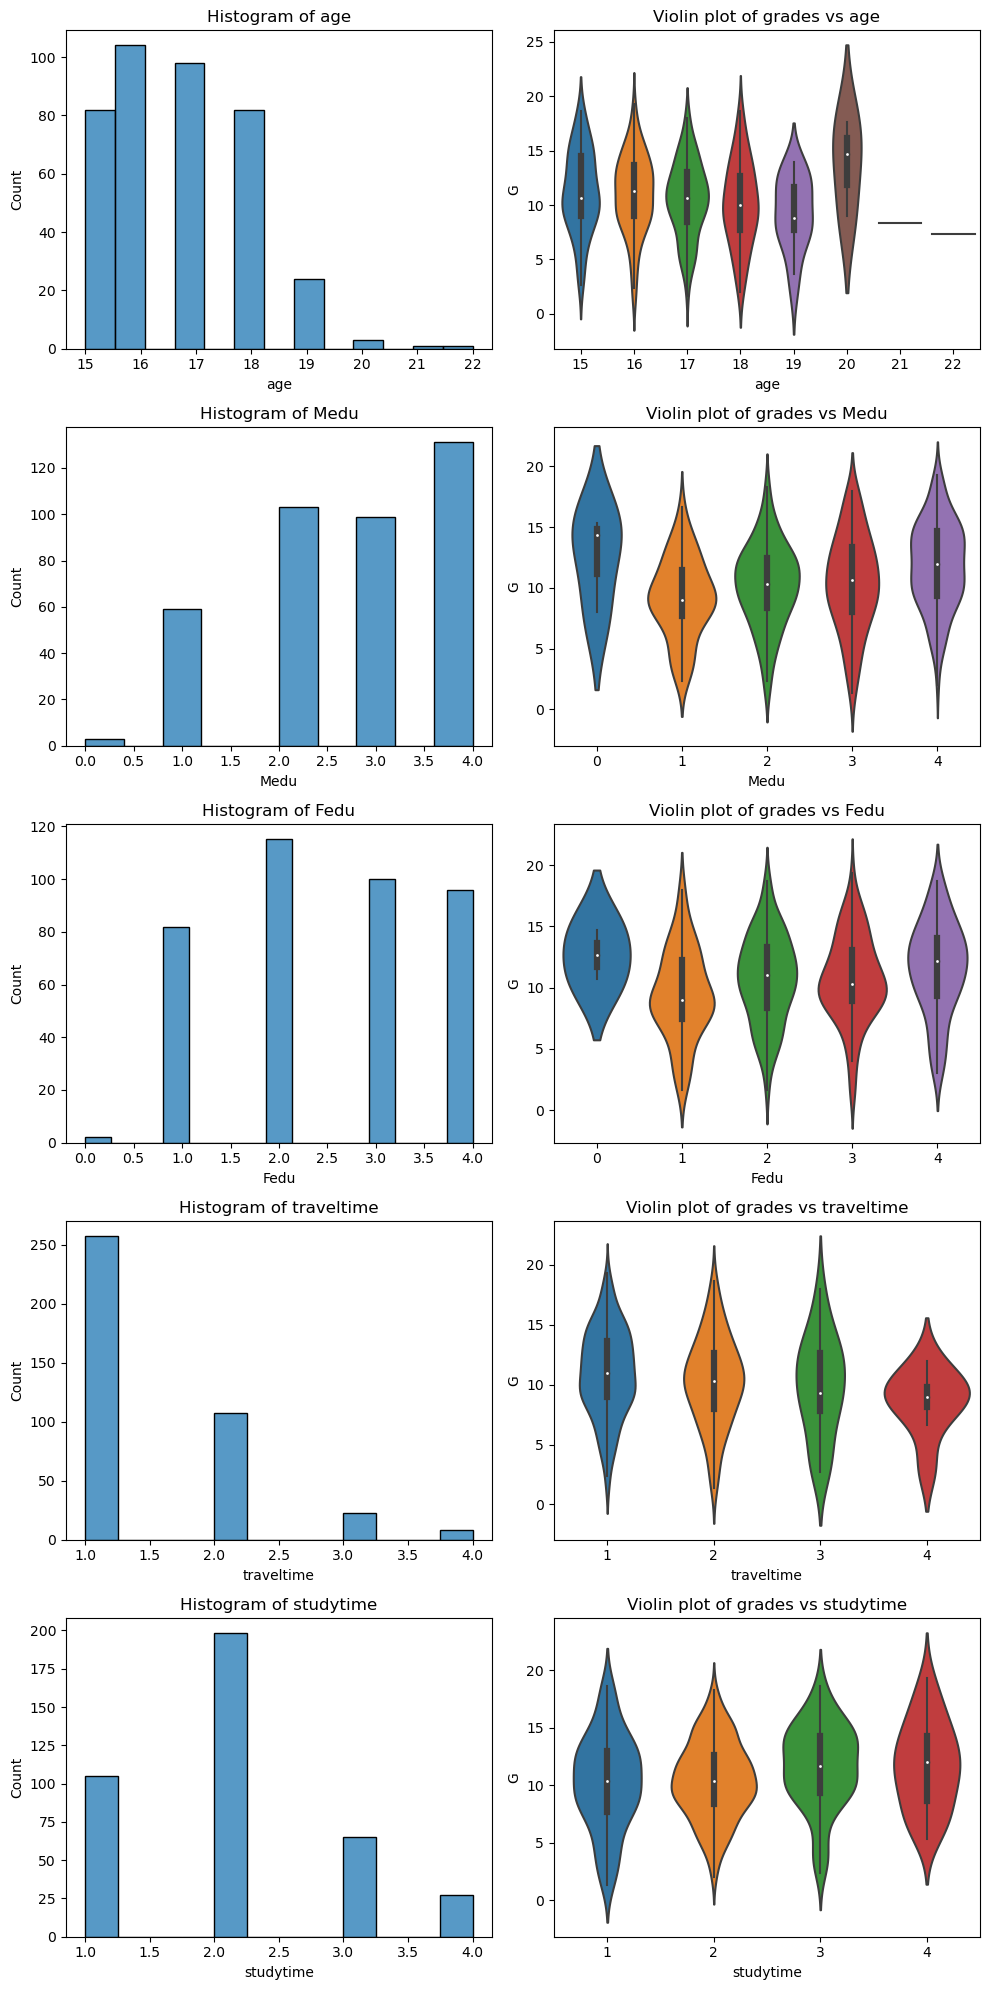

In [171]:
numeric_attributes_1 = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime']

fig, axs = plt.subplots(len(numeric_attributes_1), 2, figsize=(10, 20))

for i, attribute in enumerate(numeric_attributes_1):
    sns.histplot(df[attribute], ax=axs[i, 0])
    axs[i, 0].set_title(f'Histogram of {attribute}')
    sns.violinplot(x=attribute, y='G', data=df, ax=axs[i, 1])
    axs[i, 1].set_title(f'Violin plot of grades vs {attribute}')

plt.tight_layout()
plt.show()

### ANALYSIS OF GRAPHS WITH NUMERICAL ATTRIBUTES (1):

**1. By Age**

Upon examining the graphs, it can be noticed that there is a slight decrease in the number of students as age increases from 16 to 19 years old. The interquartile range (IQR) also demonstrates a weak negative correlation, while the median grade does not show a clear linear relationship. Thus, it can be hypothesized that *there is a weak correlation between age and the final grade*.

**2-3. By Fedu and Medu**

Based on the data presented in the two graphs, some similarities can be observed among students whose parents (both) have a low level of education (0), followed by a weak positive correlation with increasing levels of education. However, in the graph with maternal education, the correlation, although weak, is more pronounced compared to the graph with paternal education. Therefore, it can be concluded that *the level of parental education influences students' (their children's) grades*.

**4. By TravelTime**

Analyzing the histogram, it can be seen that most students live close to school, as the time spent traveling to school is minimal. Judging by the second graph, a weak but negative trend can be observed, indicating *a relationship between travel time and grades*.

**5. By StudyTime**

Here, it can be observed that most students spend around 2 hours per week studying, and on the second graph, *there is no clear dependency between the amount of time spent on studying outside of school and the student's grade.*

### Numerical Attributes (2):

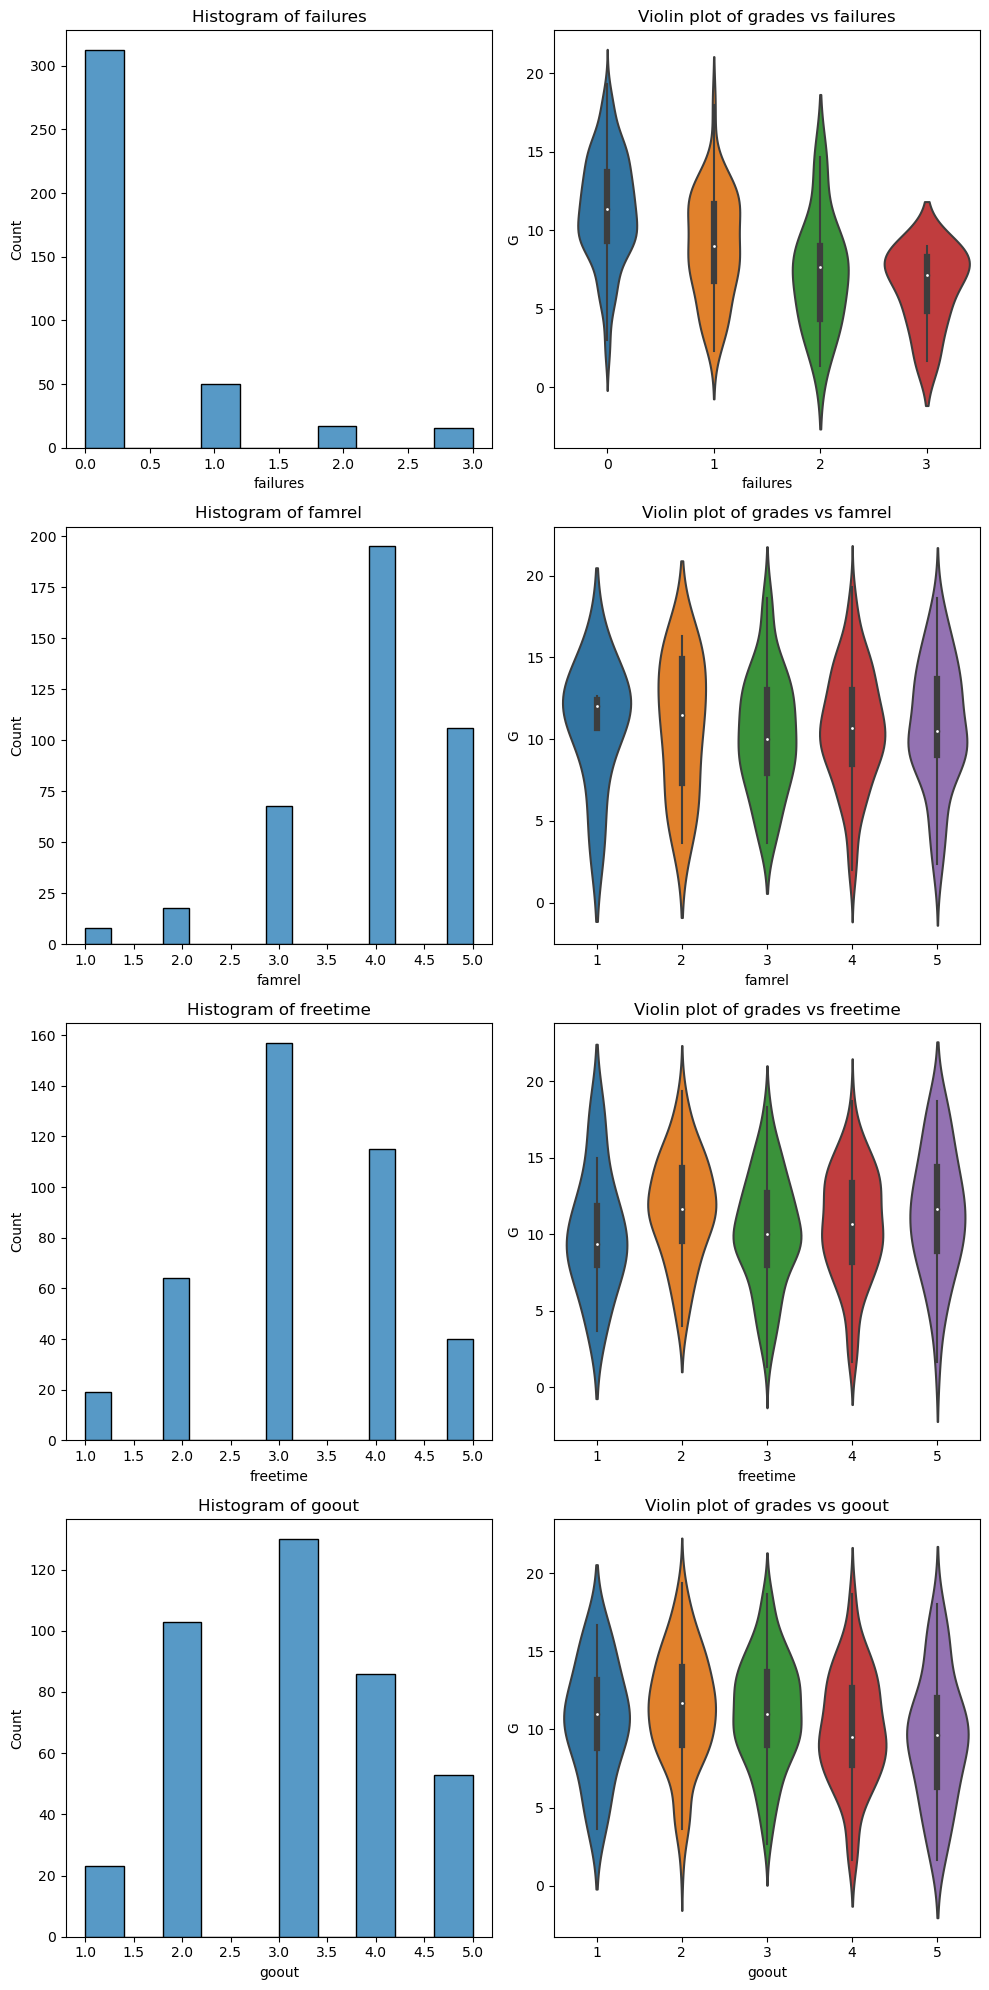

In [172]:
numeric_attributes_2 = ['failures', 'famrel', 'freetime', 'goout']

fig, axs = plt.subplots(len(numeric_attributes_2), 2, figsize=(10, 20))

for i, attribute in enumerate(numeric_attributes_2):
    sns.histplot(df[attribute], ax=axs[i, 0])
    axs[i, 0].set_title(f'Histogram of {attribute}')
    sns.violinplot(x=attribute, y='G', data=df, ax=axs[i, 1])
    axs[i, 1].set_title(f'Violin plot of grades vs {attribute}')

plt.tight_layout()
plt.show()

### ANALYSIS OF GRAPHS WITH NUMERIC ATTRIBUTES (2):

**1. By Failures**

The histogram shows that the majority of students do not have failures. The Violin Plot indicates a trend: the more failures, the lower the grades. This suggests that *frequent failures may indicate lower academic performance.*

**2. By FamRel**

Most students have good (4) family relationships, but there is no clear correlation observed on the Violin Plot. Therefore, it can be concluded that *there is no clear relationship between the quality of family relationships and academic performance.*

**3. By Freetime**

The histogram indicates that most students have around 3 hours of free time. A positive trend is observed on the Violin Plot, suggesting *a weak correlation between free time and student grades.*

**4. By Goout**

Students most commonly spend time with friends at a frequency of 3, as seen in the histogram. Analyzing the Violin Plot, a weak negative correlation (judging by the IQR) is observed: the more often students go out with friends, the lower the average grade. *Therefore, it can be said that there is a weak, but present, relationship.*

### Numerical Attributes (3):

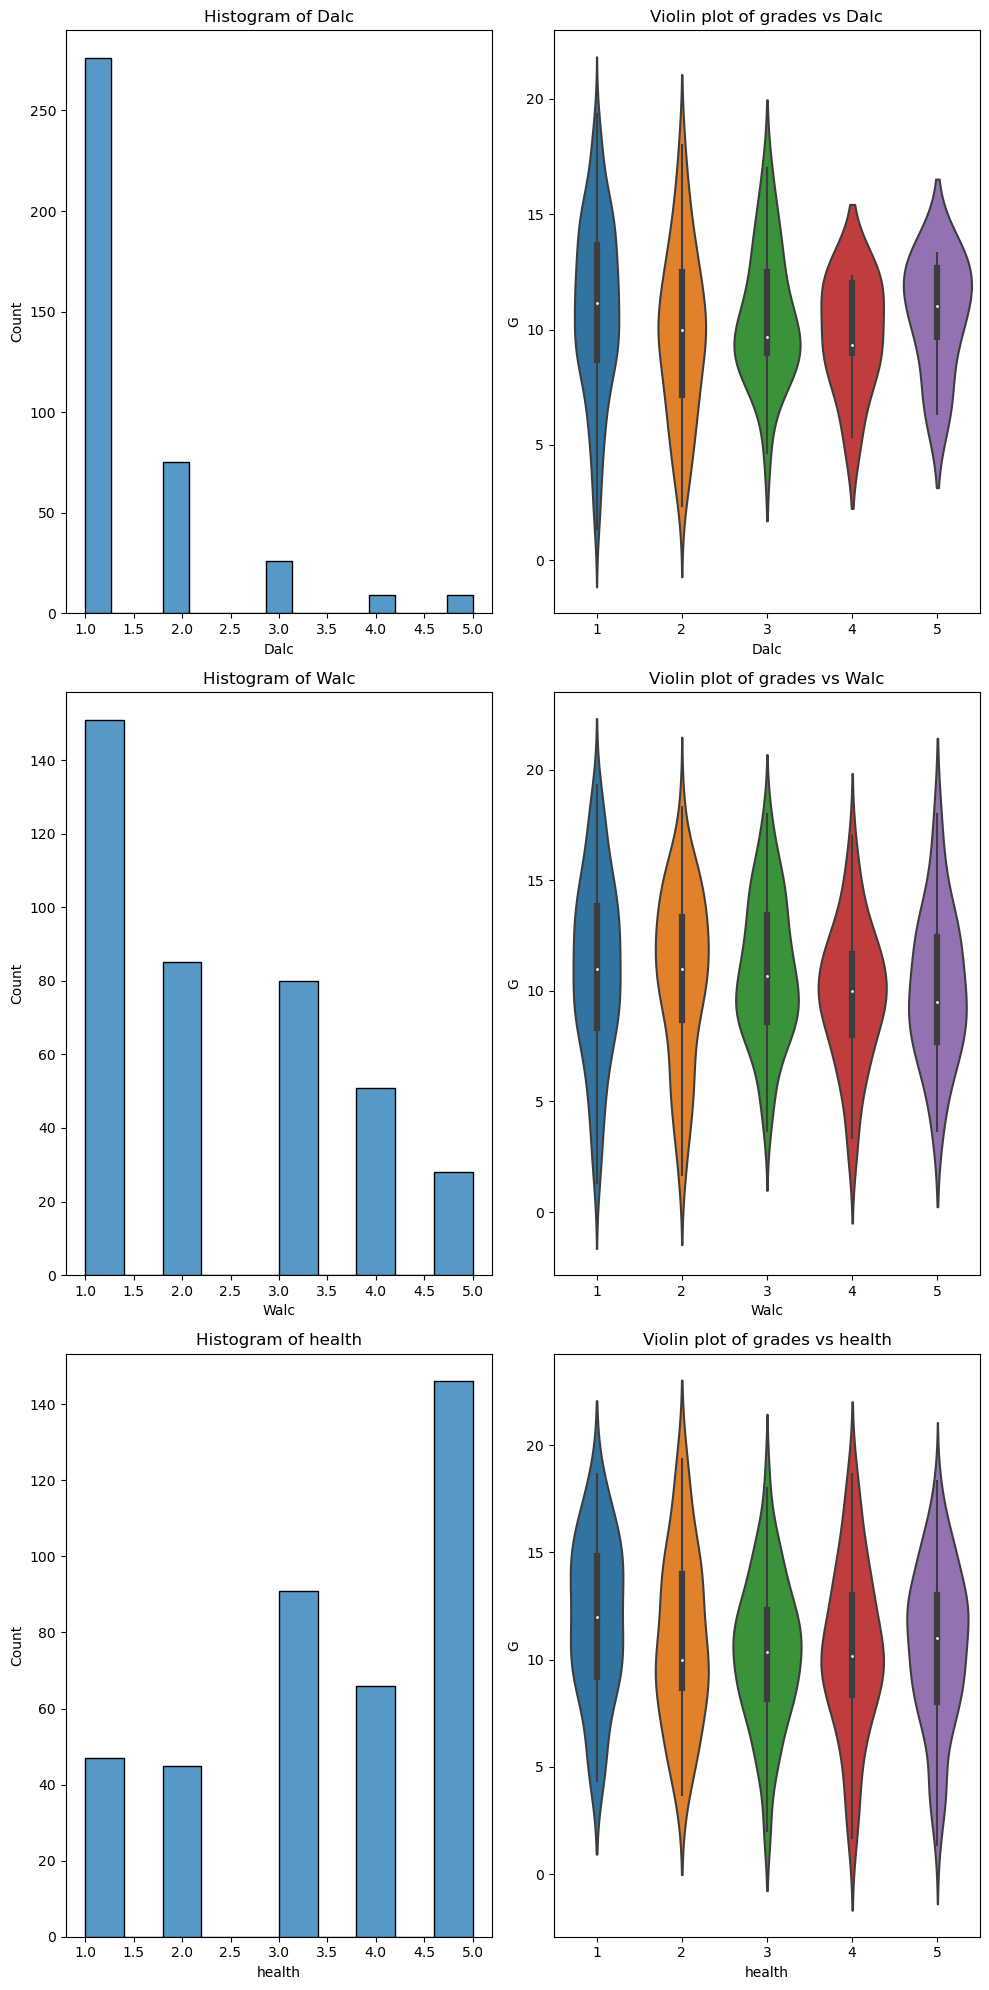

In [173]:
numeric_attributes_3 = ['Dalc', 'Walc', 'health']

fig, axs = plt.subplots(len(numeric_attributes_3), 2, figsize=(10, 20))

for i, attribute in enumerate(numeric_attributes_3):
    sns.histplot(df[attribute], ax=axs[i, 0])
    axs[i, 0].set_title(f'Histogram of {attribute}')
    sns.violinplot(x=attribute, y='G', data=df, ax=axs[i, 1])
    axs[i, 1].set_title(f'Violin plot of grades vs {attribute}')

plt.tight_layout()
plt.show()


### ANALYSIS OF GRAPHS WITH NUMERICAL ATTRIBUTES (3):

**1. Grades by Walc (Weekend Alcohol Consumption).**

The majority of students do not consume alcohol on weekdays, indicating minimal impact on their grades. This is corroborated by the second graph, where *no clear correlation between grades and alcohol consumption is observed.*

**2. Grades by Dalc (Workday Alcohol Consumption).**

According to the Violin Plot, the median grade shows a weak negative correlation, while the IQR indicates the opposite. However, there is a *relationship between weekend alcohol consumption and grades: the less frequently students consume alcohol on weekends, the higher their grades.*

**3. Grades by Health.**

Analyzing both graphs, there doesn't appear to be a clear link between students' health status and their grades. Thus, it can be concluded that *health status does not significantly influence grades.*

### Numerical Attributes (4):

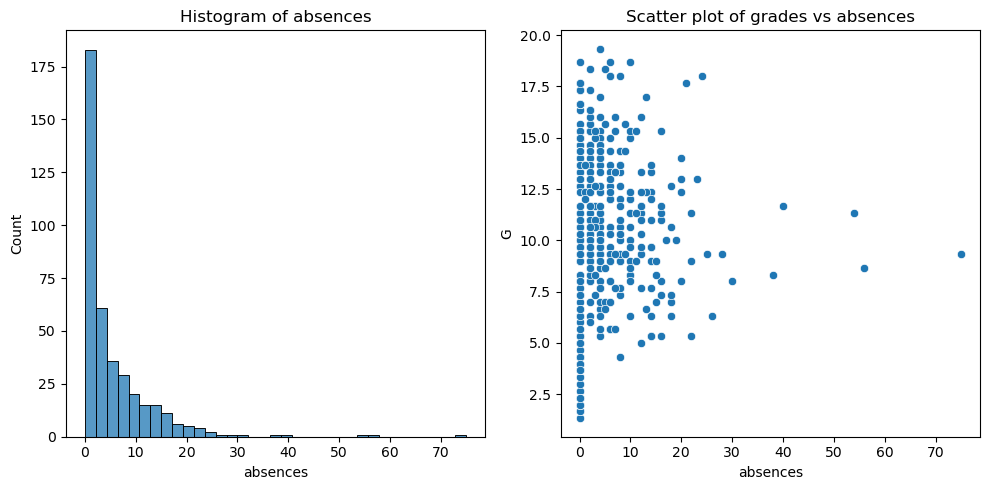

In [174]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(df['absences'], ax=axs[0])
axs[0].set_title('Histogram of absences')
sns.scatterplot(x='absences', y='G', data=df, ax=axs[1])
axs[1].set_title('Scatter plot of grades vs absences')

plt.tight_layout()
plt.show()

**1. By Absences** 

From the histogram, it's evident that the majority of students have between 0 to 10 absences. The frequency of absences sharply decreases as their count increases, indicating that most students have a low number of absences. On the second graph, it's noticeable that students with higher grades mostly have fewer absences. As the number of absences increases, the count of students decreases, and these students generally have lower grades.

*Therefore, it can be inferred that the number of class absences may affect a student's final grade.*

## Conclusion and recommendations

In my conclusion, I will focus on the factors that influence grades and based on this, I will propose recommendations aimed at improving the students' average score.

After analyzing the data, three categories of conclusions were identified:
1) factors that do not have a direct impact on the grade;
2) factors that have a weak influence on the grade, and their influence may be related to interaction with other factors - additional information is required to clarify this;
3) factors that have a direct correlation and influence on the grade.

In my conclusion, I will focus on the factors that have a direct impact on grades, and based on this, I will propose recommendations aimed at improving the students' average score.

- Let's consider the factor of **student's living address type**: in this case, a recommendation to educational institutions could be to consider providing transportation services and/or dormitories for students living in rural areas. This could help reduce commuting time to school and improve access to educational resources.

- Schools could also offer **additional educational programs or resources for students who may struggle with their studies**. This could involve extra classes or individual consultations.

- Schools and parents can **actively encourage students to pursue higher education**. This may include career counseling, information sessions about higher education opportunities, and assistance with college preparation.

- **Providing internet access** can be a key factor in improving students' academic performance. Therefore, schools and parents can help by providing necessary resources or assistance.

- In cases where parents are unable to fulfill the role of guardians, it is important to ensure the presence of **another responsible adult** who can support the student in their studies.

- Parents can **motivate their children to study** by demonstrating the importance of education through their own experiences.

- **To reduce absenteeism, schools** can implement specific strategies such as a attendance reward system or interventions for students with high absenteeism.


Factors requiring further investigation but for which hypotheses can be formulated based on the results obtained so far:
- It's possible that schools GP and MS have different curricula or teaching methods, which may affect student performance.
- Men and women may have different approaches to studying.
- Family educational support may involve assistance with homework, discussing academic topics, or even just providing moral support.
- Early education in kindergarten may help develop skills and habits that are beneficial for further learning.
- Students choosing a school based on reputation or other factors may be more motivated to study.
- As students age, they may develop other interests and responsibilities that distract them from their studies. This could include work, family obligations, or social life.
- Long commute times to school may reduce the time available for studying or rest. This could lead to fatigue or stress, which in turn could lower student performance.
- Socializing with friends can be both a beneficial and distracting factor.
- Alcohol consumption may affect a student's ability to learn. This could lead to fatigue, difficulties with concentration, or memory issues.


# Prediction Tools: Grade Prediction

I used linear regression to predict students' final grades. To do this, I selected a number of attributes that could affect academic performance, such as address, parents' education, number of failures, and others. To ensure the model correctly handled categorical data, I applied label encoding using LabelEncoder. Then the data was scaled using StandardScaler to improve model performance. To evaluate the model's performance, the data was split into training and testing sets in an 80:20 ratio. After training the model and conducting testing, the mean squared error (MSE) was 12.54, indicating reasonably accurate prediction of final grades.

Based on the selected attributes and linear regression, a model was built capable of predicting students' performance with acceptable accuracy. Additionally, a function called `predict_student_grade` was created, which uses the trained model to predict a student's grade based on input data.

To test the functionality of this prediction tool, test data was used. The prediction results for three different students were as follows:

- Expected grade for the 1st test student: 9.060906147260456
- Expected grade for the 2nd test student: 6.861619579009563
- Expected grade for the 3rd test student: 8.563102655655054

These results demonstrate that the prediction tool works correctly and can be used to assess students' performance based on various attributes.

In [191]:
le = LabelEncoder()
features = ['address', 'schoolsup', 'higher', 'internet', 'Mjob', 'Fjob', 'guardian', 'Medu', 'Fedu', 'failures', 'absences']

for feature in features:
    if df[feature].dtype == 'object':
        df[feature] = le.fit_transform(df[feature])

X = df[features]
y = df['G']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error is {mse}')

Mean squared error is 12.539623752820303


In [202]:
def predict_student_grade(data):
    if not isinstance(data, dict):
        raise ValueError("wrong data")

    input_data = pd.DataFrame(data, index=[0])

    for feature in features:
        if input_data[feature].dtype == 'object':
            input_data[feature] = le.fit_transform(input_data[feature])
    input_data = scaler.transform(input_data)

    prediction = model.predict(input_data)

    return prediction[0]

In [203]:
student_data_1 = {
    'address': 'U',
    'schoolsup': 'no',
    'higher': 'yes',
    'internet': 'yes',
    'Mjob': 'teacher',
    'Fjob': 'other',
    'guardian': 'mother',
    'Medu': 4,
    'Fedu': 3,
    'failures': 0,
    'absences': 5
}

predicted_grade_1 = predict_student_grade(student_data_1)
print(f'expected 1st student grade: {predicted_grade}')


student_data_2 = {
    'address': 'R',
    'schoolsup': 'yes',
    'higher': 'no',
    'internet': 'no',
    'Mjob': 'health',
    'Fjob': 'services',
    'guardian': 'father',
    'Medu': 2,
    'Fedu': 2,
    'failures': 1,
    'absences': 10
}
predicted_grade_2 = predict_student_grade(student_data_2)
print(f'expected 2nd student grade: {predicted_grade_2}')

student_data_3 = {
    'address': 'U',
    'schoolsup': 'no',
    'higher': 'yes',
    'internet': 'yes',
    'Mjob': 'at_home',
    'Fjob': 'teacher',
    'guardian': 'mother',
    'Medu': 3,
    'Fedu': 4,
    'failures': 0,
    'absences': 0
}
predicted_grade_3 = predict_student_grade(student_data_3)
print(f'expected 3rd student grade: {predicted_grade_3}')


expected 1st student grade: 9.060906147260456
expected 2nd student grade: 6.861619579009563
expected 3rd student grade: 8.563102655655054
